In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-international-air-traffic-data/International_Report_Departures.csv
/kaggle/input/us-international-air-traffic-data/International_Report_Passengers.csv


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
data = pd.read_csv('/kaggle/input/us-international-air-traffic-data/International_Report_Departures.csv')
data.head()

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15
2,03/01/2007,2007,3,10721,BOS,13,12651,KEF,439,20402,GL,1,Departures,0,1,1
3,12/01/2004,2004,12,11259,DAL,74,16271,YYZ,936,20201,AMQ,1,Departures,0,1,1
4,05/01/2009,2009,5,13303,MIA,33,11075,CMW,219,21323,5L,0,Departures,0,20,20


In [6]:
print(data.shape)

(930808, 16)


In [8]:
data.describe()

,Year,Month,usg_apt_id,usg_wac,fg_apt_id,fg_wac,airlineid,carriergroup,Scheduled,Charter,Total
count,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000,930808.000000
mean,2006.021361,6.414783,12809.473781,42.511740,13484.676238,466.910479,20057.217505,0.599361,40.003181,2.005483,42.008665
std,8.558831,3.471070,2716.223845,27.571338,1932.601107,288.005971,479.071456,0.490028,60.948973,8.278403,60.340835
min,1990.000000,1.000000,10010.000000,1.000000,10119.000000,106.000000,19386.000000,0.000000,0.000000,0.000000,1.000000
25%,1999.000000,3.000000,11618.000000,22.000000,11868.000000,205.000000,19704.000000,0.000000,0.000000,0.000000,3.000000
50%,2007.000000,6.000000,12892.000000,33.000000,13408.000000,427.000000,19991.000000,1.000000,17.000000,0.000000,20.000000
75%,2014.000000,9.000000,13487.000000,72.000000,15084.000000,736.000000,20312.000000,1.000000,60.000000,1.000000,60.000000
max,2020.000000,12.000000,99999.000000,93.000000,16881.000000,975.000000,22067.000000,1.000000,2019.000000,1092.000000,2019.000000


### NA

In [9]:
data.isnull().sum()

data_dte           0
Year               0
Month              0
usg_apt_id         0
usg_apt            0
usg_wac            0
fg_apt_id          0
fg_apt             0
fg_wac             0
airlineid          0
carrier         3055
carriergroup       0
type               0
Scheduled          0
Charter            0
Total              0
dtype: int64

In [10]:
data['carrier'].value_counts()

AA     58739
DL     48520
UA     42469
CO     25754
FX     21621
       ...  
WOA        1
SKB        1
PNA        1
KO         1
PU         1
Name: carrier, Length: 734, dtype: int64

In [16]:
most_common_carrier = data['carrier'].mode().iloc[0]

most_common_carrier

'AA'

In [17]:
data['carrier'].fillna(most_common_carrier, inplace = True)

### convert 'data_dte'column to datetime format

In [22]:
data['data_dte'] = pd.to_datetime(data['data_dte'])
print(data.dtypes)

data_dte        datetime64[ns]
Year                     int64
Month                    int64
usg_apt_id               int64
usg_apt                 object
usg_wac                  int64
fg_apt_id                int64
fg_apt                  object
fg_wac                   int64
airlineid                int64
carrier                 object
carriergroup             int64
type                    object
Scheduled                int64
Charter                  int64
Total                    int64
dtype: object


In [23]:
data.head(10)

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,2006-05-01,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,2003-05-01,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15
2,2007-03-01,2007,3,10721,BOS,13,12651,KEF,439,20402,GL,1,Departures,0,1,1
3,2004-12-01,2004,12,11259,DAL,74,16271,YYZ,936,20201,AMQ,1,Departures,0,1,1
4,2009-05-01,2009,5,13303,MIA,33,11075,CMW,219,21323,5L,0,Departures,0,20,20
5,2007-10-01,2007,10,14761,SFB,33,11928,GLA,493,20444,JN,0,Departures,0,8,8
6,2002-02-01,2002,2,14100,PHL,23,11032,CUN,148,20402,MMQ,1,Departures,0,1,1
7,2008-02-01,2008,2,16091,YIP,43,16166,YQG,936,20201,AMQ,1,Departures,0,3,3
8,2001-11-01,2001,11,13930,ORD,41,16042,YEG,916,19531,AC,0,Departures,0,1,1
9,2003-07-01,2003,7,13198,MCI,64,13514,MTY,148,20201,AMQ,1,Departures,0,1,1


In [24]:
data = data.sort_values(by = ['Year','Month']).reset_index()

In [25]:
data.drop("index",axis = 1, inplace = True)

In [26]:
data

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,1990-01-01,1990,1,12478,JFK,22,11032,CUN,148,19983,KEQ,1,Departures,0,6,6
1,1990-01-01,1990,1,10821,BWI,35,11032,CUN,148,19892,ACQ,0,Departures,0,11,11
2,1990-01-01,1990,1,12889,LAS,85,16173,YQR,921,19523,CP,0,Departures,0,12,12
3,1990-01-01,1990,1,11618,EWR,21,10970,CGN,429,19917,5X,1,Departures,0,37,37
4,1990-01-01,1990,1,13930,ORD,41,11032,CUN,148,19684,INQ,1,Departures,0,16,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930803,2020-03-01,2020,3,14843,SJU,3,11519,EIS,282,20253,9K,1,Departures,314,0,314
930804,2020-03-01,2020,3,12266,IAH,74,13514,MTY,148,20378,YV,1,Departures,317,0,317
930805,2020-03-01,2020,3,11618,EWR,22,16215,YTZ,936,21226,PD,0,Departures,318,0,318
930806,2020-03-01,2020,3,11298,DFW,74,11032,CUN,148,19805,AA,1,Departures,360,0,360


In [30]:
data_by_year = data.groupby("Year")["Total"].sum().reset_index()
data_by_year1 = data_by_year.set_index('Year')
data_by_year1

,Total
Year,
1990,683399
1991,701843
1992,784967
1993,820376
1994,844760
1995,913350
1996,943039
1997,983723
1998,1082878


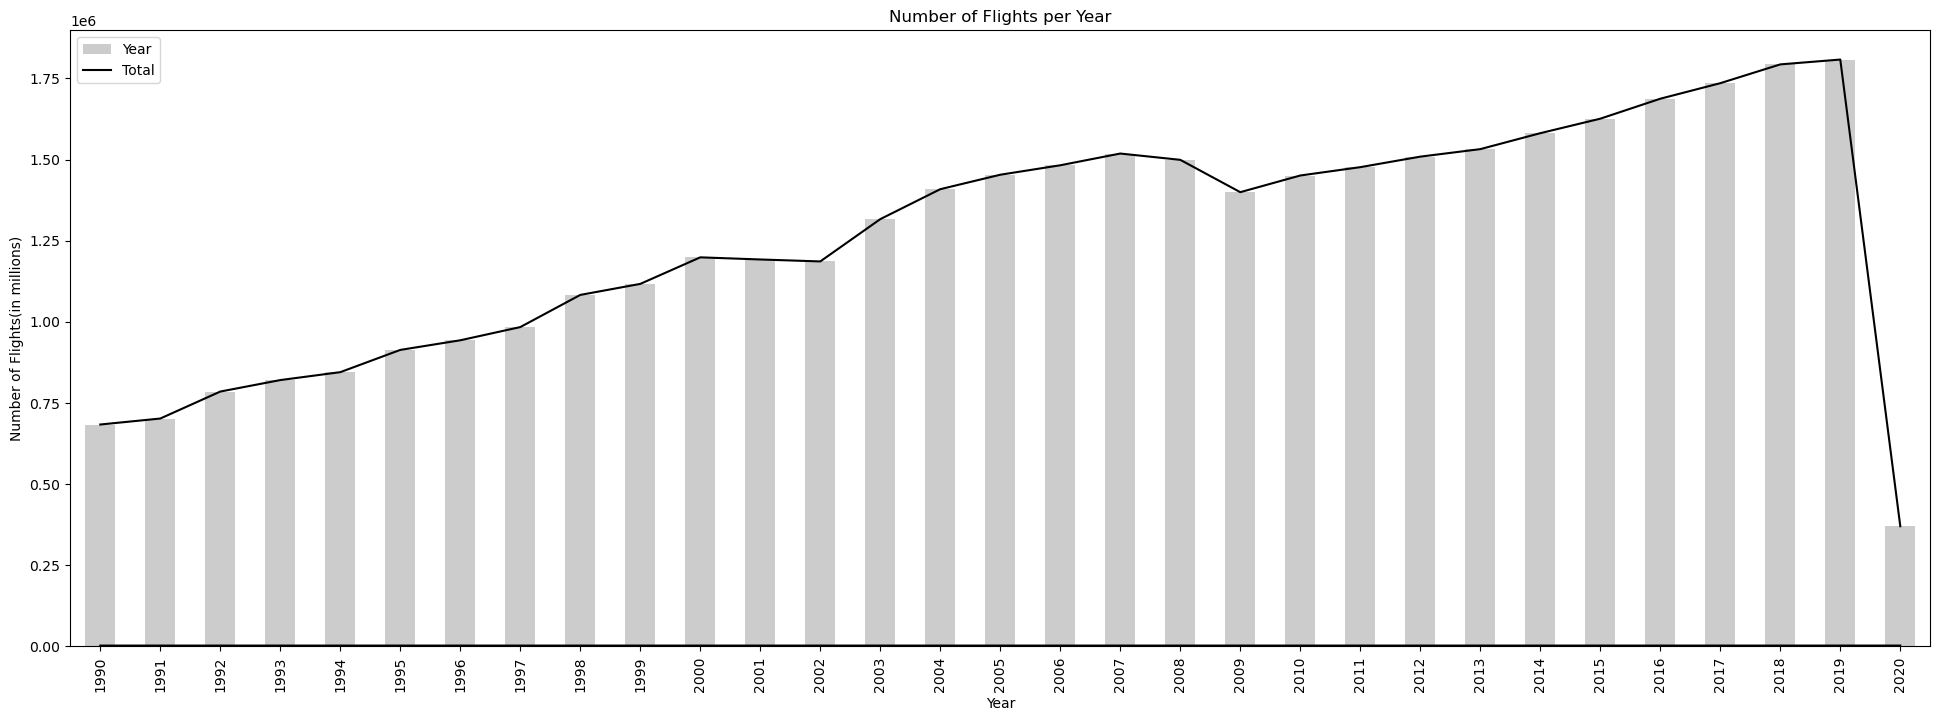

In [32]:
fig,ax = plt.subplots(figsize = (24,8))
data_by_year.plot(kind = "line", color = "black",ax = ax, title = 'Number of Flights per Year', xlabel = 'Year',ylabel = 'Number of Flights(in millions)')
data_by_year1.plot(kind = 'bar',color = 'grey', width = 0.5, alpha = 0.4, ax = ax)

handles, lables = ax.get_legend_handles_labels()
handles = [handles[2],handles[0]]
labled = [lables[2],'Trend']
ax.legend(handles, lables)
plt.show()

In [36]:
departures_by_month = data.groupby(['Year','Month'])['Total'].sum().reset_index()
departures_by_month = departures_by_month.pivot(index = "Year",columns = 'Month',values = 'Total')
departures_by_month

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1990,54129.0,49391.0,58542.0,54195.0,54863.0,56356.0,61969.0,62108.0,57527.0,57460.0,57701.0,59158.0
1991,56772.0,49264.0,55963.0,54740.0,56996.0,59295.0,64308.0,65362.0,59891.0,60152.0,57766.0,61334.0
1992,61328.0,58009.0,63137.0,63179.0,64976.0,66677.0,72168.0,71177.0,66004.0,66999.0,63749.0,67564.0
1993,68215.0,61397.0,67805.0,66408.0,68236.0,68497.0,74418.0,73869.0,67945.0,68195.0,65177.0,70214.0
1994,69881.0,62279.0,71217.0,69407.0,69322.0,69946.0,74578.0,74454.0,69667.0,71128.0,68668.0,74213.0
1995,74630.0,66804.0,75454.0,73870.0,75148.0,76822.0,82107.0,81822.0,75628.0,76230.0,74832.0,80003.0
1996,78656.0,74084.0,80511.0,76600.0,80511.0,78457.0,82919.0,84316.0,76339.0,77153.0,74512.0,78981.0
1997,79147.0,72401.0,81925.0,78799.0,81766.0,82443.0,87708.0,88596.0,81221.0,82823.0,80875.0,86019.0
1998,88877.0,81360.0,90816.0,89769.0,91828.0,91539.0,98336.0,97337.0,83980.0,90068.0,86597.0,92371.0


In [37]:
departures_by_season = pd.DataFrame()
departures_by_season["Winter"] = departures_by_month[12] + departures_by_month[1] + departures_by_month[2]
departures_by_season["Spring"] = departures_by_month[3] + departures_by_month[4] + departures_by_month[5]
departures_by_season["Summer"] = departures_by_month[6] + departures_by_month[7] + departures_by_month[8]
departures_by_season["Autumn"] = departures_by_month[9] + departures_by_month[10] + departures_by_month[11]
season_colors=["#75aad8", "#ff89ff", "#ffd900", "#ff7400"]
departures_by_season_sum = departures_by_season.sum(axis=0)
departures_by_season

,Winter,Spring,Summer,Autumn
Year,,,,
1990,162678.0,167600.0,180433.0,172688.0
1991,167370.0,167699.0,188965.0,177809.0
1992,186901.0,191292.0,210022.0,196752.0
1993,199826.0,202449.0,216784.0,201317.0
1994,206373.0,209946.0,218978.0,209463.0
1995,221437.0,224472.0,240751.0,226690.0
1996,231721.0,237622.0,245692.0,228004.0
1997,237567.0,242490.0,258747.0,244919.0
1998,262608.0,272413.0,287212.0,260645.0


<Axes: title={'center': 'Total Flights per Season'}, xlabel='Season', ylabel='Number of Flights (in tens of millions)'>

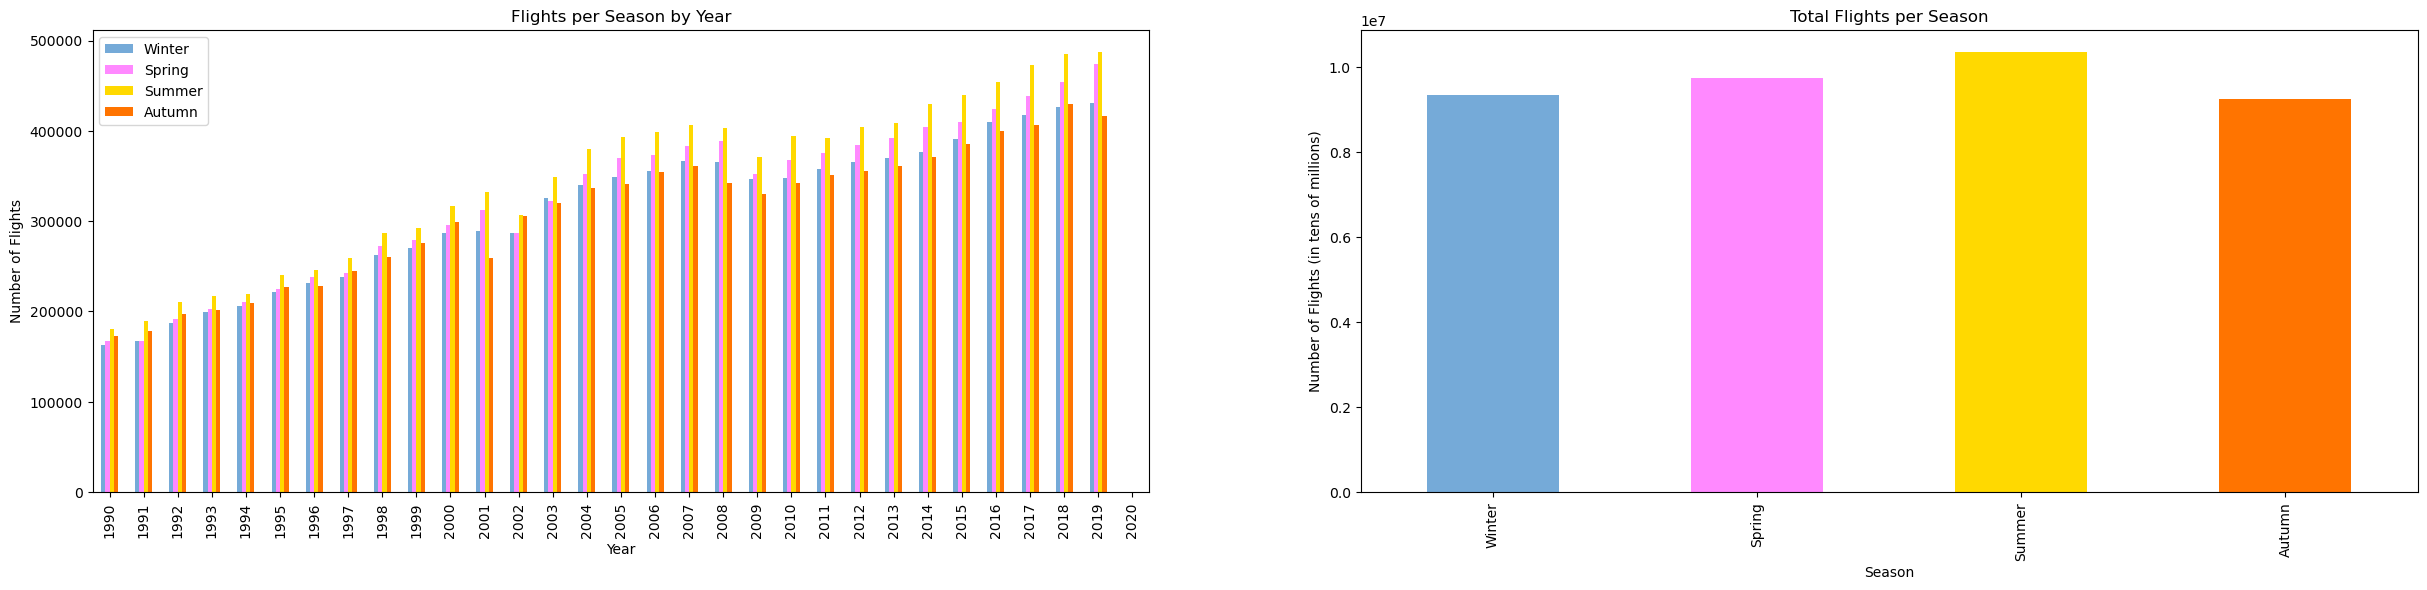

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(30,6))
departures_by_season.plot(kind="bar", stacked = False, color = season_colors, ax=ax[0], title="Flights per Season by Year", xlabel = "Year", ylabel = "Number of Flights")
departures_by_season_sum.plot(kind="bar", color = season_colors, ax=ax[1], title="Total Flights per Season", xlabel = "Season", ylabel = "Number of Flights (in tens of millions)")